In [ ]:

import numpy as np

def distance(p1, p2):
    return np.sqrt(np.sum(np.power(p2-p1, 2))) #distancia entre 2 pontos
p1 = np.array([1, 1])   #x = 1, y = 1
p2 = np.array([4, 4])   #x = 4, y = 4
distance(p1, p2)

4.242640687119285

[[2 2]
 [3 2]]


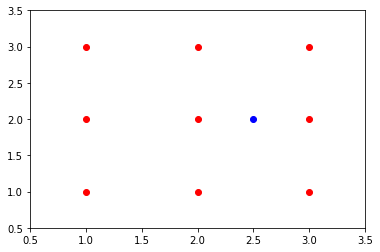

In [ ]:
import numpy as np
import random
import scipy.stats as ss
import matplotlib.pyplot as plt

points = np.array([[1, 1], [1, 2], [1, 3], [2, 1], [2, 2], [2, 3], [3, 1], [3, 2], [3, 3]])
   #pontos = pontos existentes
p = np.array([2.5, 2])   #p = pontos que queremos colocar

def majority_vote(votes):
    vote_counts = {}
    for vote in votes:
        if vote in vote_counts:
           vote_counts[vote]+= 1
        else:
            vote_counts[vote]= 1
    winners = []
    max_count = max(vote_counts.values())
    for vote, count in vote_counts.items():
        if count == max_count:
            winners.append(vote)
    return random.choice(winners) #escolhe um ganhador aleatorio se tiver mais de um

#>>>votes =[1, 2, 3, 2, 2, 3, 1, 1, 2, 3, 1, 1, 1, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 1, 1, 2]
#sample vote counts above
# >>>vote_counts = majority_vote(votes)

def majority_vote_short(votes):
    mode, count = ss.mstats.mode(votes)
    return mode

def find_nearest_neighbours(p, points, k = 5):  #algorithm to find the nearest neighbours
    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i]= distance(p, points[i])
    ind = np.argsort(distances)      #returns index, according to sorted values in array
    return ind[:k]

ind = find_nearest_neighbours(p, points, 2);print(points[ind])
 #gives the nearest neighbour's for this sample case

plt.plot(points[:, 0], points[:, 1], "ro")
plt.plot(p[0], p[1], "bo")
plt.axis([0.5, 3.5, 0.5, 3.5])
plt.show()

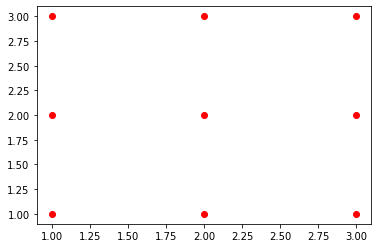

In [ ]:
import numpy as np
import random
import scipy.stats as ss
import matplotlib.pyplot as plt


def knn_predict(p, points, outcomes, k = 5):
    ind = find_nearest_neighbours(p, points, k)
    return majority_vote(outcomes[ind])

outcomes = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])
knn_predict(np.array([2.5, 2.7]), points, outcomes, k = 2)

def generate_synth_data(n = 50):
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 20
plt.figure()
plt.plot(points[:n, 0], points[:n, 1], "ro")
plt.plot(points[n:, 0], points[n:, 1], "bo")
plt.show()

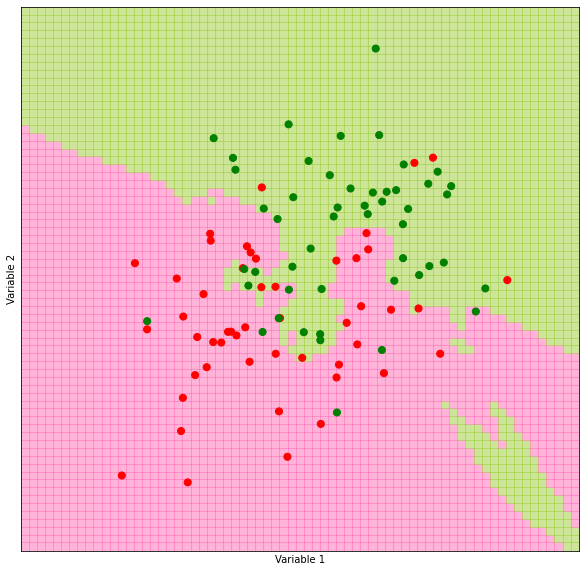

In [ ]:
import numpy as np
import random
import scipy.stats as ss
import matplotlib.pyplot as plt

def make_prediction_grid(predictors, outcomes, limits, h, k):
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min, x_max, h)
    ys = np.arange(y_min, y_max, h)
    xx, yy = np.meshgrid(xs, ys)

    prediction_grid = np.zeros(xx.shape, dtype = int)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p = np.array([x, y])
            prediction_grid[j, i] = knn_predict(p, predictors, outcomes, k)
    return (xx, yy, prediction_grid)

def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink", "lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red", "blue", "green"])
    plt.figure(figsize =(10, 10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:, 0], predictors [:, 1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

(predictors, outcomes) = generate_synth_data()
# >>>predictors.shape
# >>>outcomes.shape
k = 5; filename ="knn_synth_5.pdf"; limits =(-3, 4, -3, 4); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)
plt.show()

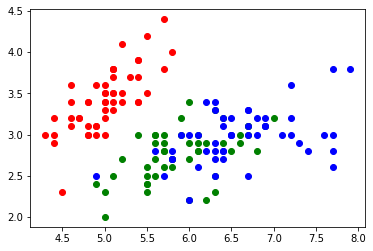

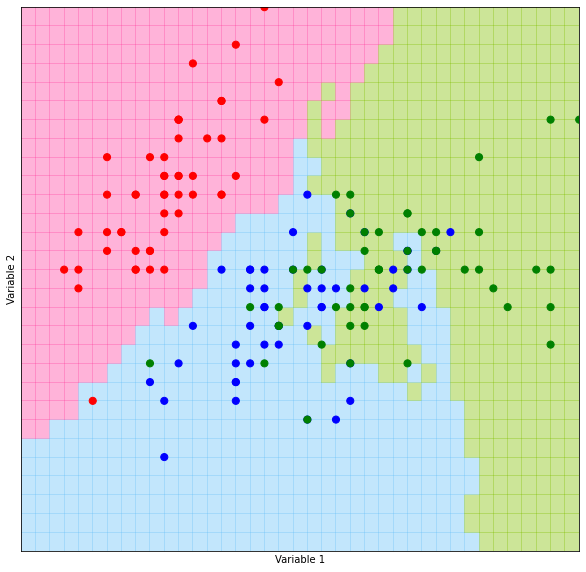

 prediction by scikit learn : 
84.0
 prediction by own model : 
84.66666666666667


In [ ]:
from sklearn import datasets
import numpy as np
import random
import matplotlib.pyplot as plt

iris = datasets.load_iris()
    # >>>iris["data"]
predictors = iris.data[:, 0:2]
outcomes = iris.target

plt.plot(predictors[outcomes == 0][:, 0], predictors[outcomes == 0][:, 1], "ro")
plt.plot(predictors[outcomes == 1][:, 0], predictors[outcomes == 1][:, 1], "go")
plt.plot(predictors[outcomes == 2][:, 0], predictors[outcomes == 2][:, 1], "bo")

k = 5; filename ="iris_grid.pdf"; limits =(4, 8, 1.5, 4.5); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)
plt.show()

from sklearn.neighbors import KNeighborsClassifier #predictions from scikit
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

   # >>>sk_predictions == my_predictions
   # >>>np.mean(sk_predictions == my_predictions)
print(" prediction by scikit learn : ")
print(100 * np.mean(sk_predictions == outcomes))
print(" prediction by own model : ")
print(100 * np.mean(my_predictions == outcomes))
 # our homemade predicter is actually somewhat better